In [63]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Dinamika manipulatora
Analiziramo manipulator prikazan na slici. Generalizirane koordinate kojima opisujemo gibanje su: $q_1$, $q_2$, $q_3$ te njihove pripadne derivacije.



# Simbolički toolbox

In [191]:
# simboličke varijable
m2, m3 = sy.symbols(r"m2 m3")
t, g = sy.symbols(r"t g")


#pomaci
q1, q2, q3 = sy.symbols(r"q_1, q_2, q_3", cls=sy.Function)
q1 = q1(t)
q2 = q2(t)
q3 = q3(t)

#brzine
v1 = sy.diff(q1,t)
v2 = sy.diff(q2,t)
v3 = sy.diff(q3,t)

#akceleracije
a1 = sy.diff(v1,t)
a2 = sy.diff(v2,t)
a3 = sy.diff(v3,t)

#vanjske sile
f1, f2, f3 = sy.symbols(r"f_1, f_2, f_3", cls=sy.Function)
f1=f1(t)
f2=f2(t)
f3=f3(t)


Sada možemo ispisati simboličke izraze za brzine i akceleracije te uočavamo kako su zadani pomoću poopćenih pomaka što nam je bio i cilj.

In [11]:
q1

q_1(t)

In [14]:
v1

Derivative(q_1(t), t)

In [16]:
a1

Derivative(q_1(t), (t, 2))

# Lagrangeova funkcija
Potrebno je raspisati kinetičke i potenicjalne energije pojedinih članova sustava prema sljedećim jednadžbama.
Kinetička energija za translaciju:
                                    $$E_k = \frac{mv^{2}}{2}$$

Bitno je naglasiti da u ovom primjeru nemamo kinetičku energiju rotacije.

Potencijalna energija za translaciju glasi:
$$E_p = mgh$$

In [192]:
#kinetička energija
ek = 0.5 * (((m2*v2**2)) + (m2*v1**2) + (m3*v1**2) + (m3*v2**2) + (m3*v3**2))

#potencijalna energija
ep = m2*g*q1 + m3*g*q1

#Lagrange
lgr = ek -ep

In [20]:
ek

0.5*m2*Derivative(q_1(t), t)**2 + 0.5*m2*Derivative(q_2(t), t)**2 + 0.5*m3*Derivative(q_1(t), t)**2 + 0.5*m3*Derivative(q_2(t), t)**2 + 0.5*m3*Derivative(q_3(t), t)**2

In [21]:
ep

g*m2*q_1(t) + g*m3*q_1(t)

In [22]:
lgr

-g*m2*q_1(t) - g*m3*q_1(t) + 0.5*m2*Derivative(q_1(t), t)**2 + 0.5*m2*Derivative(q_2(t), t)**2 + 0.5*m3*Derivative(q_1(t), t)**2 + 0.5*m3*Derivative(q_2(t), t)**2 + 0.5*m3*Derivative(q_3(t), t)**2

# Jednadžbe gibanja
Iz Lagrangeove funkcije dobivamo tri jednadžbe gibanja, jer sustav ima tri stupnja slobode. Jednadžbe gibanja simbolički su zapisane kao:
$$ \frac{\partial \mathcal{L}}{\partial\phi_1}-\frac{d\partial \mathcal{L}}{dt\partial \dot{\phi_1}}  = f_{\phi_1}(t) \qquad (1)$$

$$\frac{\partial \mathcal{L}}{\partial\phi_2}-\frac{d\partial \mathcal{L}}{dt\partial \dot{\phi_2}} = f_{\phi_2}(t) \qquad (2)$$

$$\frac{\partial \mathcal{L}}{\partial q}-\frac{d\partial \mathcal{L}}{dt\partial \dot{q}}  = f_q(t) \quad\qquad (3) $$

Simboli  $f_q$, $f_{\phi_1}$ i $f_{\phi_2}$ označavaju generalizirane sile i momente.

In [197]:
jed1 = (-sy.diff (lgr, q1) + sy.diff(sy.diff(lgr, v1), t) - f1 ).simplify()
jed2 = (-sy.diff (lgr, q2) + sy.diff(sy.diff(lgr, v2), t) - f2 ).simplify()
jed3 = (-sy.diff (lgr, q3) + sy.diff(sy.diff(lgr, v3), t) - f3 )
jed1

1.0*g*m2 + 1.0*g*m3 + 1.0*m2*Derivative(q_1(t), (t, 2)) + 1.0*m3*Derivative(q_1(t), (t, 2)) - 1.0*f_1(t)

# Inverzna kinematika
Iz jednadžbi gibanja možemo pronaći vremenski ovisne vanjske sile $f_1$, $f_2$ i $f_3$ koje će poslužiti za rješavanje problema inverzne kinematike gdje zadajemo trajektoriju kojom bi se manipulator gibao te iz nje dobivamo moment i sile koje su potrebni u aktuatorima da manipulator izvrši zadano gibanje.

In [201]:
sile = sy.solve([jed1, jed2, jed3], (f1, f2, f3), simplify=True, rational=False)
sile[f1]

1.0*g*m2 + 1.0*g*m3 + 1.0*m2*Derivative(q_1(t), (t, 2)) + 1.0*m3*Derivative(q_1(t), (t, 2))

# Numerički oblik jednadžbi 
Naredbom sy.lamdify pretvaramo simbolične jednadžbe u numeričke.

In [202]:
f1_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3), sile[f1])
f2_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3), sile[f2])
f3_num = sy.lambdify ((t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3), sile[f3])
# Zadane konstante sustava
g=9.81
m2=1
m3=1




# Trajektorija
Za problem inverzne kinematike zadana je trajektorija prihvatnika manipulatora prikazana u 2D i 3D. Vrijeme trajanja simulacije je 10 sekundi. 

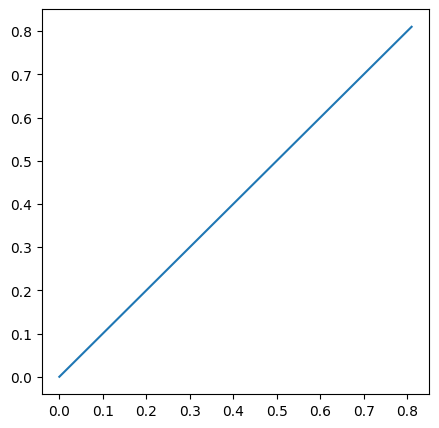

In [203]:

t = np.arange(0,10,1)
L = 1

q1 = (L/10)*t
v1 = L/10
a1 = 0

q2 = (L/10)*t
v2 = L/10
a2 = 0

q3 = (L/10)*t
v3 = L/10
a3 = 0

r = np.array([q2*q1,q3*q3])

fig,ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(r[0,:],r[1,:])

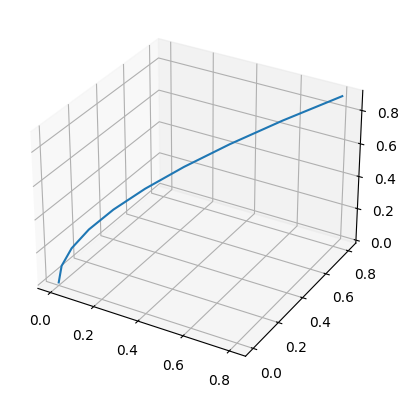

In [204]:
fig,ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot(r[0,:],r[1,:], q2)

# Moment i sile u aktuatorima
Izračun momenta i sila u aktuatorima napravljen je numeričkim putem te grafovi prikazuju raspodijelu momenta i sila u aktuatorima u ovisnosti o vremenu.

In [205]:
F1=f1_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3)
result1 = str(F1)
print(result1[1])

9


In [156]:
F2=f2_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3)
result2 = str(F2)
print(result2[3])


0


In [123]:
F3=f3_num(t, g, v1, v2, v3, a1, a2, a3, q1, q2, q3, m2, m3)
F3

-0.0

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

c:\Users\Matteo98\.idlerc\Python\lib\site-packages\matplotlib\tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
c:\Users\Matteo98\.idlerc\Python\lib\site-packages\matplotlib\tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
c:\Users\Matteo98\.idlerc\Python\lib\site-packages\matplotlib\patches.py:749: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
c:\Users\Matteo98\.idlerc\Python\lib\site-packages\matplotlib\transforms.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


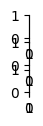

In [206]:
fig,ax = plt.subplots(3,1,figsize=(0,1))

ax[0].plot(t,F1)
ax[0].set_title(r"Moment 1. aktuatora")

ax[1].plot(t,F2)
ax[1].set_title(r"Sila 2. aktuatora")

ax[2].plot(t,F3)
ax[2].set_title(r"Sila 3. aktuatora")